In [1]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
from google.colab import drive
drive.mount('gdrive', force_remount=True)
root_dir = "gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at gdrive


In [3]:
!pip install "torch==1.4" "torchvision==0.5.0"
from fastai.vision import *

     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 47.6MB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101


In [0]:
folder = 'normal'
file = 'normal.csv'

In [0]:
folder = 'tyre bulges'
file = 'tyre bulges.csv'

In [0]:
folder = 'tyre sidewall cracking'
file = 'tyre sidewall cracking.csv'

In [0]:
folder = 'exposed'
file = 'exposed.csv'

In [0]:
folder = 'linear air'
file = 'linear air.csv'

In [0]:
folder = 'tread'  
file = 'tread.csv'

In [0]:
path = Path(base_dir + 'data/tyre')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True) 

In [11]:
path.ls()

[PosixPath('gdrive/My Drive/fastai-v3/data/tyre/tyre bulges'),
 PosixPath('gdrive/My Drive/fastai-v3/data/tyre/tyre sidewall cracking'),
 PosixPath('gdrive/My Drive/fastai-v3/data/tyre/exposed'),
 PosixPath('gdrive/My Drive/fastai-v3/data/tyre/linear air'),
 PosixPath('gdrive/My Drive/fastai-v3/data/tyre/normal'),
 PosixPath('gdrive/My Drive/fastai-v3/data/tyre/models'),
 PosixPath('gdrive/My Drive/fastai-v3/data/tyre/tyrebulges.jpg'),
 PosixPath('gdrive/My Drive/fastai-v3/data/tyre/linearair.png'),
 PosixPath('gdrive/My Drive/fastai-v3/data/tyre/tread'),
 PosixPath('gdrive/My Drive/fastai-v3/data/tyre/exposed.jpg'),
 PosixPath('gdrive/My Drive/fastai-v3/data/tyre/tread.jpg'),
 PosixPath('gdrive/My Drive/fastai-v3/data/tyre/sidewallcracking.jpg'),
 PosixPath('gdrive/My Drive/fastai-v3/data/tyre/normal.jpg'),
 PosixPath('gdrive/My Drive/fastai-v3/data/tyre/export.pkl'),
 PosixPath('gdrive/My Drive/fastai-v3/data/tyre/tread wear indicator')]

In [0]:
classes = ['exposed', 'linear air', 'normal', 'tread','tyre bulges', 'tyre sidewall cracking']

In [0]:
#download_images('gdrive/My Drive/fastai-v3/download.dms', dest, max_pics=20, max_workers=0)

In [0]:
# If you have problems download, try with `max_workers=0` to see exceptions:
#download_images(path/file, dest, max_pics=20, max_workers=0)

In [14]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

exposed


linear air


normal


tread


tyre bulges


tyre sidewall cracking


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=6).normalize(imagenet_stats)

In [16]:
data.classes

['exposed',
 'linear air',
 'normal',
 'tread',
 'tyre',
 'tyre bulges',
 'tyre sidewall cracking']

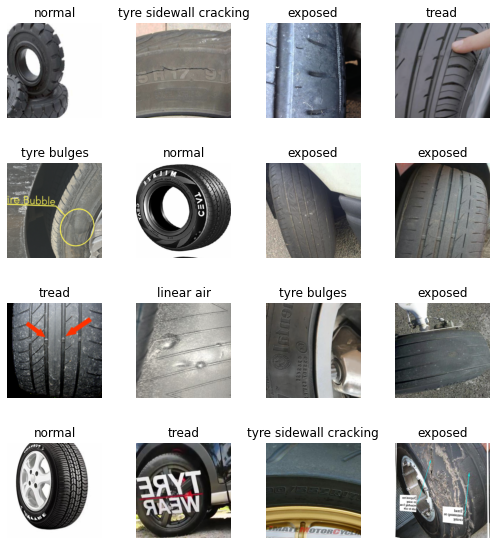

In [17]:
data.show_batch(rows=4, figsize=(7,8))

In [18]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['exposed',
  'linear air',
  'normal',
  'tread',
  'tyre',
  'tyre bulges',
  'tyre sidewall cracking'],
 7,
 421,
 105)

In [19]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [20]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.898290,1.696288,0.504762,00:09
1,2.120502,1.775538,0.380952,00:07
2,1.613842,1.663520,0.371429,00:07
3,1.340098,1.582256,0.342857,00:07
4,1.148824,1.516164,0.333333,00:07


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

Min numerical gradient: 7.59E-07
Min loss divided by 10: 8.32E-05


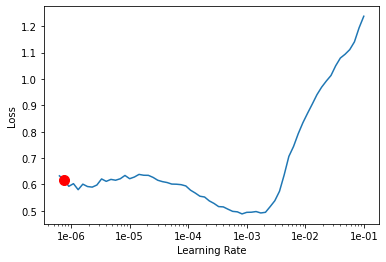

In [0]:
learn.recorder.plot(suggestion=True)

In [0]:
min_grad_lr = learn.recorder.min_grad_lr
min_grad_lr

7.585775750291837e-07

In [0]:
learn.fit_one_cycle(4, min_grad_lr) 

epoch,train_loss,valid_loss,error_rate,time
0,0.591154,1.240350,0.295238,00:12
1,0.640720,1.217376,0.295238,00:12
2,0.621025,1.220150,0.295238,00:12
3,0.611723,1.225016,0.295238,00:12


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

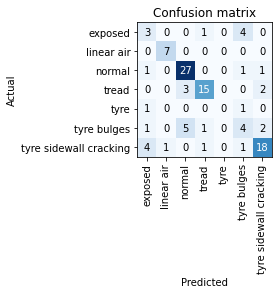

In [0]:
interp.plot_confusion_matrix()

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

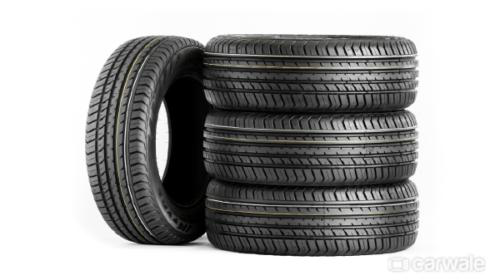

In [0]:
img = open_image('gdrive/My Drive/fastai-v3/data/tyre/normal.jpg')
img

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
if(pred_idx==1):
  print("Linear air")
elif(pred_idx==0):
  print("Exposed")
elif(pred_idx==2):
  print("Normal")
elif(pred_idx==3):
  print("Tread")
elif(pred_idx==5):
  print("Tyre Bulges")
elif(pred_idx==6):
  print("Tyre Sidewall Cracking")

Normal
